<a href="https://colab.research.google.com/github/mashaan14/only-numpy/blob/main/only_numpy_spectral_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding spectral clustering using numpy functions

In [174]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

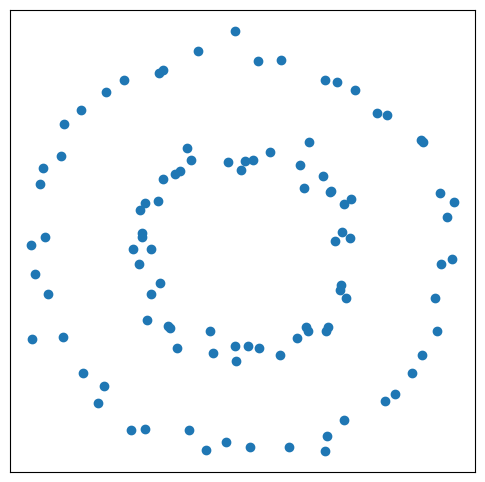

In [181]:
n_samples = 100
seed = 30
X, _ = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)

fig = plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.savefig('data.png', bbox_inches='tight', dpi=600)

In [143]:
# An n by n matrix, where each element represents the disance between a pair of samples
A_full = np.sqrt(np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1))

In [144]:
# get the indices of the smallest k+1 elements
A_sort = A_full.argsort(axis=0)[:6]
A = np.zeros_like(A_full)

# fill the indices of the nearest neighbor with ones
for i in range(A.shape[0]):
  A[i,A_sort[:,i]] = 1

np.fill_diagonal(A, 0)

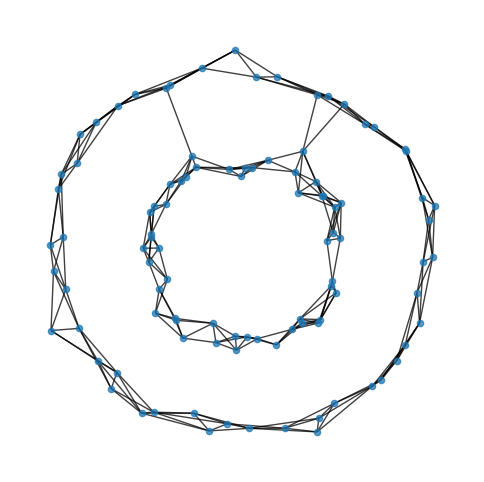

In [145]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
G1 = nx.from_numpy_array(A)
nx.draw(G1, X, node_size=20, alpha=0.75)
# ax.set_title('$k$nn graph with $k=3$')
ax.set_axis_off()
plt.savefig('graph.png', bbox_inches='tight', dpi=600)

In [167]:
# identity matrix
I = np.zeros_like(A)
np.fill_diagonal(I, 1)

# degree matrix
D = np.zeros_like(A)
np.fill_diagonal(D, np.sum(A,axis=1))
D_inv_sqrt = np.linalg.inv(np.sqrt(D))

L = I - np.dot(D_inv_sqrt, A).dot(D_inv_sqrt)

In [168]:
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
# Order the eigenvectors in a decreasing order based on the magnitude of their corresponding eigenvalues
eigenvectors_sorted = eigenvectors[:,eigenvalues.argsort()]

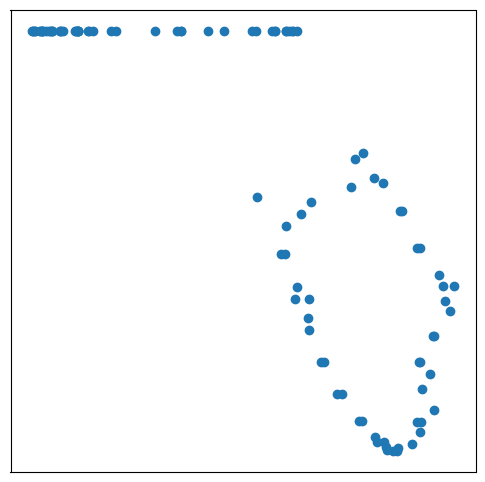

In [182]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(eigenvectors_sorted[:,0], eigenvectors_sorted[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.savefig('X_transformed.png', bbox_inches='tight', dpi=600)

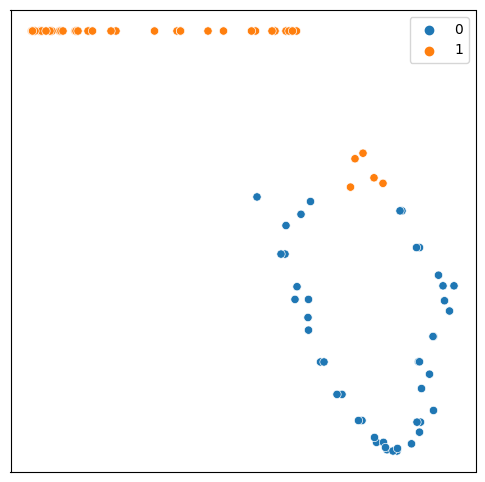

In [183]:
X_transformed = eigenvectors_sorted[:,0:2]
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_transformed)

fig = plt.figure(figsize=(6, 6))
g = sns.scatterplot(data = X_transformed, x = X_transformed[:,0], y = X_transformed[:,1], hue = kmeans.labels_)
g.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

plt.savefig('X_transformed_label.png', bbox_inches='tight', dpi=600)

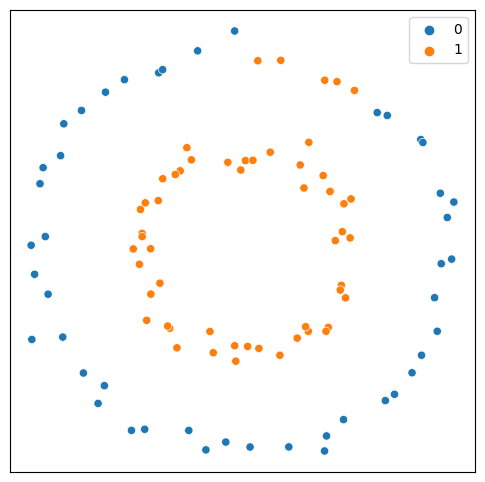

In [184]:
fig = plt.figure(figsize=(6, 6))
g = sns.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = kmeans.labels_)
g.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

plt.savefig('X_label.png', bbox_inches='tight', dpi=600)